<a href="https://colab.research.google.com/github/Jaswanth-Devarinti/Extending-FastTextEmbeddings/blob/main/fastTextTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Fasttext

In [1]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip
%cd fastText-0.9.2
!make

c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/meter.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/fasttext.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG args.o autotune.o matrix.o dictionary.o loss.o productquantizer.o densematrix.o quantmatrix.o vector.o model.o utils.o meter.o fasttext.o src/main.cc -o fasttext


In [2]:
%cd ..

/content


#Sample Data

In [3]:
!mkdir 'Data'

In [4]:
%cd 'Data'

/content/Data


In [5]:
!cp '/content/drive/MyDrive/Data/eng_news_2020_1M.tar.gz' '/content/Data'

In [6]:
!tar -xvf 'eng_news_2020_1M.tar.gz'

eng_news_2020_1M/
eng_news_2020_1M/eng_news_2020_1M-import.sql
eng_news_2020_1M/eng_news_2020_1M-words.txt
eng_news_2020_1M/eng_news_2020_1M-inv_w.txt
eng_news_2020_1M/eng_news_2020_1M-sentences.txt
eng_news_2020_1M/eng_news_2020_1M-sources.txt
eng_news_2020_1M/eng_news_2020_1M-inv_so.txt
eng_news_2020_1M/eng_news_2020_1M-co_s.txt
eng_news_2020_1M/eng_news_2020_1M-co_n.txt


In [7]:
with open('/content/Data/eng_news_2020_1M/eng_news_2020_1M-sentences.txt') as f:
    data = f.read()
data[:100]

'1\t!, 05/27/1994) — NHL Network, 2 p.m. & 10 p.m.\n2\t$0 spent on advertising sans the rare times we se'

In [20]:
import re
with open('/content/Data/eng_news_2020_1M/preocessed_data.txt','w') as f:
    data = data.lower()
    data = re.sub(r'[^a-z 0-9]',' ',data)
    data = ' '.join(data.split())
    f.write(data)

In [8]:
%cd ..

/content


#Building FastText Models

In [9]:
!mkdir 'Model1'
!mkdir 'Model2'

In [10]:
%cd fastText-0.9.2

/content/fastText-0.9.2


In [21]:
!./fasttext skipgram -input '/content/Data/eng_news_2020_1M/preocessed_data.txt' -output '/content/Model1/model1'

Read 21M words
Number of words:  64404
Number of labels: 0
Progress: 100.0% words/sec/thread:    9871 lr:  0.000000 avg.loss:  1.998348 ETA:   0h 0m 0s


In [22]:
!./fasttext skipgram -input '/content/Data/eng_news_2020_1M/preocessed_data.txt' -output '/content/Model2/model2'

Read 21M words
Number of words:  64404
Number of labels: 0
Progress:  23.0% words/sec/thread:    9458 lr:  0.038508 avg.loss:  2.116651 ETA:   0h12m 2sl
Progress:  23.2% words/sec/thread:    9459 lr:  0.038417 avg.loss:  2.116832 ETA:   0h12m 0sk
Progress: 100.0% words/sec/thread:    9537 lr:  0.000000 avg.loss:  2.000590 ETA:   0h 0m 0s


#Loading Models

In [23]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from fasttext import FastText

In [25]:
ft1 = FastText.load_model('/content/Model1/model1.bin')
ft2 = FastText.load_model('/content/Model2/model2.bin')

In [26]:
ft1.get_nearest_neighbors('good')

[(0.7525215744972229, 'bad'),
 (0.7358795404434204, 'nice'),
 (0.7321945428848267, 'great'),
 (0.7203713059425354, 'luck'),
 (0.7203660011291504, 'better'),
 (0.7090163826942444, 'decent'),
 (0.697594165802002, 'okay'),
 (0.6869414448738098, 'worthwhile'),
 (0.6841835379600525, 'crappy'),
 (0.6751186847686768, 'always')]

In [27]:
ft2.get_nearest_neighbors('good')

[(0.7551253437995911, 'bad'),
 (0.7518788576126099, 'nice'),
 (0.7202087640762329, 'great'),
 (0.7062771916389465, 'decent'),
 (0.6949061155319214, 'better'),
 (0.6904738545417786, 'really'),
 (0.6883261203765869, 'crappy'),
 (0.6856555342674255, 'honest'),
 (0.6839231252670288, 'always'),
 (0.678413450717926, 'kind')]

In [28]:
from scipy.spatial.distance import cosine

In [29]:
def get_cosine_similarity(word_embed1,word_embed2):
    return 1-cosine(word_embed1,word_embed2)

In [33]:
def compare_models_vectors(word):
    embed1 = ft1.get_word_vector(word)
    embed2 = ft2.get_word_vector(word)
    return get_cosine_similarity(embed1,embed2)

In [35]:
word = 'great'
compare_models_vectors(word)

0.5789466500282288

#Now let's try to bring them to same space 

Let's Analyze the word vector space with PCA

In [60]:
import random

In [72]:
all_words = ft1.get_words()

In [73]:
input_matrix_1 = ft1.get_input_matrix()
vector_id_list_1 = [ft1.get_word_id(word) for word in all_words]
vectors_1 = input_matrix_1[vector_id_list_1]

In [74]:
input_matrix_2 = ft2.get_input_matrix()
vector_id_list_2 = [ft2.get_word_id(word) for word in all_words]
vectors_2 = input_matrix_2[vector_id_list_2]

In [75]:
from sklearn.decomposition import PCA
pca1 = PCA()
Xt1 = pca1.fit_transform(vectors_1)

In [76]:
from sklearn.decomposition import PCA
pca2 = PCA()
Xt2 = pca2.fit_transform(vectors_2)

In [77]:
import numpy as np

In [78]:
Xt = np.concatenate([Xt1,Xt2])
y = [0]*len(all_words)+[1]*len(all_words)

In [79]:
Xt.shape

(128808, 100)

In [80]:
import matplotlib.pyplot as plt

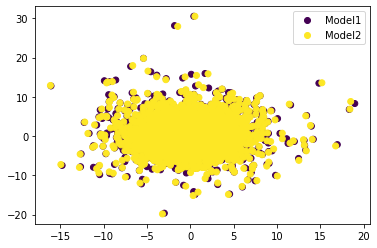

In [81]:
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=['Model1','Model2'])
plt.show()

As we can see, they are pretty much aligned in PCA, that means the vectors produced by two models are just some kind of transformation, that still holds the same kind of relationship between words

**Method 1**
If we assume they hold some linear transformation then, we can kind of see it as **Wx = Y**. We can try to solve it using closed solution of linear regression

Attaching the reference here
[closed form solution for linear regression](https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71)

In [136]:
def project(X,W):
    X = X.reshape((1,100))
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    projects = np.dot(X, W)
    return projects[0]

In [137]:
def compare_models_vectors_new(word,W):
    embed1 = ft1.get_word_vector(word)
    proj_embed1 = project(embed1,W)
    embed2 = ft2.get_word_vector(word)
    return get_cosine_similarity(proj_embed1,embed2)

In [138]:
def compare_two_scores(word_list,W):
    score_list1 = np.array([compare_models_vectors(word) for word in word_list])
    score_list2 = np.array([compare_models_vectors_new(word,W) for word in word_list])
    diff_list = score_list2-score_list1
    return max(diff_list),min(diff_list)

In [118]:
len(all_words)

64404

In [143]:
number_of_random_samples = 1000
random_samples = random.sample(all_words,number_of_random_samples)

def learn_projection_matrix(X,y):
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

word_vec_id_1 = [ft1.get_word_id(word) for word in random_samples]
word_vec_1 = input_matrix_1[word_vec_id_1]

word_vec_id_2 = [ft2.get_word_id(word) for word in random_samples]
word_vec_2 = input_matrix_1[word_vec_id_2]

W = learn_projection_matrix(word_vec_1,word_vec_2)

In [144]:
W.shape

(101, 100)

In [145]:
word = 'help'
print('Old :',compare_models_vectors(word))
print('New :',compare_models_vectors_new(word,W))

Old : 0.7320360541343689
New : 0.7320360995548307


In [135]:
compare_two_scores(all_words)

(-0.07384773100083608, -1.293358086977881)